# Análisis y Predicción de Precios de Autos (Core)
Objetivo: Aplicar técnicas de regresión lineal, KNN y árboles de decisión para predecir precios de autos utilizando un dataset de Kaggle. Realizar un Análisis Exploratorio de Datos (EDA) completo y comparar el rendimiento de los modelos mediante benchmarking.

Dataset: Automobile Dataset

Descripción del Dataset: Este conjunto de datos contiene información detallada sobre diferentes modelos de autos, incluyendo características técnicas y precios. El objetivo es predecir el precio de los autos basándose en sus características.

Instrucciones:

Parte 1: Análisis Exploratorio de Datos (EDA)

1. Carga y Exploración de Datos:

- Cargar el dataset y revisar la estructura básica.
- Descripción de las variables y su distribución.
- Detección y tratamiento de valores nulos.
- Identificación y tratamiento de outliers.
- Análisis de correlación entre variables.

Parte 2: Preparación de Datos

2. Preprocesamiento:

- Selección de características importantes.
- Transformación de variables categóricas.
- División del conjunto de datos en entrenamiento y prueba.
- Escalado de características.

Parte 3: Modelos de Regresión

3. Regresión Lineal:

- Entrenamiento del modelo.
- Evaluación del rendimiento (MSE y R²).
 

4. K-Nearest Neighbors (KNN):
- Entrenamiento del modelo.
- Evaluación del rendimiento (MSE y R²).

5. Árbol de Decisión:

- Entrenamiento del modelo.
- Evaluación del rendimiento (MSE y R²).

Parte 4: Benchmarking y Comparación de Modelos

6. Comparación de Modelos:

- Comparar los resultados de los tres modelos en términos de MSE y R².
- Discusión sobre las diferencias en el rendimiento de los modelos.

Conclusión

7. Interpretación de Resultados:

- Analizar cuál de los modelos es más adecuado para el problema de predicción de precios de autos.
- Discutir posibles mejoras y próximos pasos, como el ajuste de hiperparámetros o el uso de técnicas avanzadas.

Tareas Adicionales y Desafíos

8. Desafíos Adicionales:

- Optimización de Modelos: Usar GridSearchCV para optimizar los hiperparámetros de KNN y el Árbol de Decisión.
- Feature Engineering: Crear nuevas características basadas en las existentes para mejorar el rendimiento del modelo.
- Validación Cruzada: Implementar validación cruzada para evaluar la estabilidad de los modelos.

Nota: Asegúrate de documentar cada paso del proceso, incluyendo la justificación de las decisiones tomadas durante el preprocesamiento y la selección de modelos. Presenta un informe final con tus hallazgos, conclusiones y posibles mejoras.

In [99]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importamos las librerías que necesitamos

#Cargamos el dataset
df = pd.read_csv('/Users/mathiorti/Desktop/Me/Cursos/Data Analisis and Machine Learning/Automobile_data.csv')
print(df.head())

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [85]:
#Hay algunos datos que figuran como object en vez de como corresponden. Esto es porque no
#aparecen como NaN y aparecen como ?
df.replace('?', np.nan, inplace = True) #Con esto arreglamos eso
print(df.isnull().sum())

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


In [86]:
#Si no se considera como NaN dará un error
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'], errors = 'coerce')
df['bore'] = pd.to_numeric(df['bore'], errors='coerce')
df['stroke'] = pd.to_numeric(df['stroke'], errors='coerce')

#normalized-losses lo completaré con el promedio
df['normalized-losses'] = df['normalized-losses'].fillna(df['normalized-losses'].mean())
#numero de puertas con moda
#bore y stroke también hare con el promedio
df['num-of-doors'] = df['num-of-doors'].fillna(df['num-of-doors'].mode()[0])
df['bore'] = df['bore'].fillna(df['bore'].mean())
df['stroke'] = df['stroke'].fillna(df['stroke'].mean())
#Horsepower, peak rpm y price considero que es muy importante entonces no lo promedio, mejor lo elimino
df.dropna(subset = ['horsepower', 'peak-rpm', 'price'], inplace = True)
#Ahora verifico
print(df.isnull().sum())

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


In [87]:
print(df.describe())

        symboling  normalized-losses  wheel-base      length       width  \
count  199.000000         199.000000  199.000000  199.000000  199.000000   
mean     0.839196         122.000000   98.824121  174.151256   65.882412   
std      1.257009          32.157441    6.090838   12.371905    2.110996   
min     -2.000000          65.000000   86.600000  141.100000   60.300000   
25%      0.000000          99.500000   94.500000  166.550000   64.100000   
50%      1.000000         122.000000   97.000000  173.200000   65.500000   
75%      2.000000         139.500000  102.400000  183.500000   66.700000   
max      3.000000         256.000000  120.900000  208.100000   72.000000   

           height  curb-weight  engine-size        bore      stroke  \
count  199.000000   199.000000   199.000000  199.000000  199.000000   
mean    53.775879  2556.030151   126.824121    3.329392    3.250411   
std      2.447039   519.855544    41.752932    0.269106    0.310926   
min     47.800000  1488.000000 

In [88]:
print(df.dtypes)


symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


In [89]:
#Modifiquemos los tipos de datos de las columnas que sean necesarias
df['normalized-losses'] = df['normalized-losses'].astype(int)
df['num-of-doors'] = df['num-of-doors'].astype('category')
df['horsepower'] = df['horsepower'].astype(int)
df['peak-rpm'] = df['peak-rpm'].astype(int)
print(df.dtypes)

symboling               int64
normalized-losses       int64
make                   object
fuel-type              object
aspiration             object
num-of-doors         category
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              int64
peak-rpm                int64
city-mpg                int64
highway-mpg             int64
price                  object
dtype: object


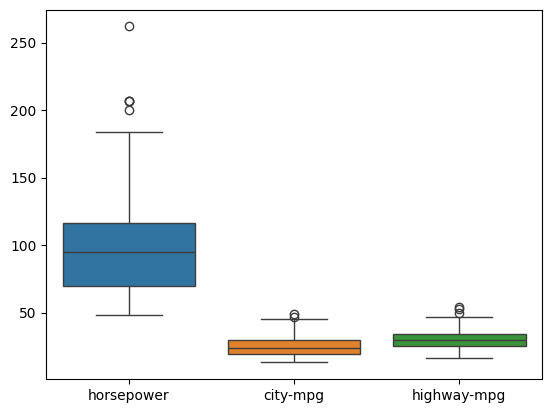

In [90]:
#Ahora trataremos los outliers
sns.boxplot(data = df[['horsepower', 'city-mpg', 'highway-mpg']])
plt.show()

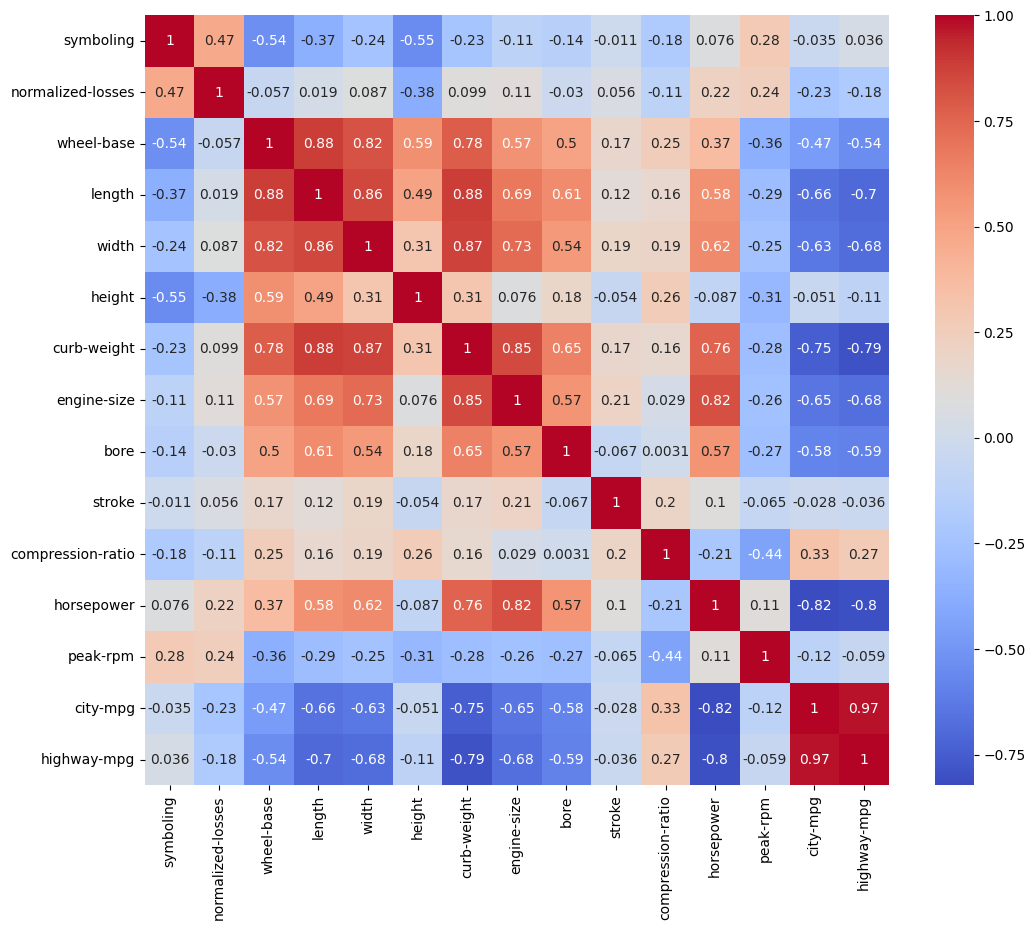

In [91]:
#Considero que estos valores son posibles así que no los elimino
#Ahora haremos un análisis de correlación entre las variables
df_numeric = df.select_dtypes(include = ['int64', 'float64'])
corr_matrix = df_numeric.corr(method = 'pearson') #si no pongo el método el usará pearson por defecto
plt.figure(figsize = (12, 10))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

In [92]:
results = {} #Esto es para almacenar los resultados
#Ahora seleccionaremos las variables que vamos a usar
X = df.drop(['price'], axis = 1) #Con esto selecciono todo menos price
y = df['price'].astype(float)

#Dividimos el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Debemos dividir las columnas categóricas y numéricas
categorical_features = X.select_dtypes(include = ['object']).columns
numerical_features = X.select_dtypes(include=['number']).columns

#Creamos el preprocesador usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown = 'ignore'), categorical_features)
    ]
)

#Creamos el pipeline para la regresión lineal
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

#Ajustamos el modelo a los datos de entrenamiento
pipeline.fit(X_train, y_train)

#Realizamos las predicciones
y_pred = pipeline.predict(X_test)

#Evaluamos el rendimiento (MSE y R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
results['Regresión lineal'] = {'MSE': mse, 'R2': r2}
print(f'Regresión lineal - MSE: {mse:.2f}, R2: {r2:.2f}')

#Ahora vamos con el K-Nearest Neighbors
#Creamos el pipeline para el KNN
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors = 5))
])

#Entrenamos el modelo
pipeline.fit(X_train, y_train)

#Realizamos las predicciones
y_pred = pipeline.predict(X_test)

#Evaluamos el rendimiento (MSE y R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
results['KNN'] = {'MSE': mse, 'R2': r2}
print(f'KNN - MSE: {mse:.2f}, R2: {r2:.2f}')

#Ahora vamos el el árbol de decisión
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state = 0))
])

#Entrenamos el modelo
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

#Evaluamos el rendimiento (MSE y R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
results['Arbol de decisión'] = {'MSE': mse, 'R2': r2}
print(f'Arbol de decisión: - MSE: {mse:.2f}, R2: {r2:.2f}')

Regresión lineal - MSE: 15554414568221306767112975417344.00, R2: -137573610307627713036288.00
KNN - MSE: 39356310.63, R2: 0.65
Arbol de decisión: - MSE: 13323658.70, R2: 0.88


In [93]:
#Ahora comparamos los resultados de los tres modelos
#podemos hacer un dataframe con los resultados
results_df = pd.DataFrame(results).T
print(results_df)


                            MSE            R2
Regresión lineal   1.555441e+31 -1.375736e+23
KNN                3.935631e+07  6.519066e-01
Arbol de decisión  1.332366e+07  8.821567e-01


In [94]:
#Teniendo en cuenta los resultados podemos concluir lo siguiente:
#Regresión lineal:
#La regresión lineal no es la adecuada para estos datos, seguramente la relación entre las características
#y la variable objetino no es lineal. El modelo no logra capturar adecuadamente la complejidad de los datos.

#KNN
#El modelo captura bien las relaciones complejas y no lineales entre las variables. El R2 indica un ajuste
#moderado y el MSE es bajo, esto nos dice que el modelo puede ser útil para este tipo de datos.

#Árbol de decisión
#Este modelo es el más adecuado para estos datos, obtuvo los mejores resultados con un MSE bajo y un R2 alto
#que nos indica que está dando el mejor rendimiento si lo comparamos con los otros modelos.

#Concluimos entonces que el árbol de decisión es el mejor modelo para estos datos, con su capacidad para 
#capturar relaciones no lineales. Y el peor es la Regresión Lineal.

Para tener predicciones más precisas podemos:

Ajustar los hiperparámetos
- KNN
    - El valor de k es importante para el renidimiento. Podemos buscar el valor óptimo de  con Grid Search o con Random Search
    - Se puede probar también otras métricas de distancia como Manhattan o la distancia de Minkowski
- Árbol de Decisión
    - Podemos ajustar hiperparámetros como la profundidad máxima del árbol, el número mínimo de muestras en una hoja y criterio de división para mejorar la precisión y reducir el sobreajuste.
    - El uso de GridSearchCV permite ajustar los hiperparámetros para encontrar la combinación óptima.

Podemos hacer uso de técnicas avanzadas

- Random Forest: Conjunto de árboles de decisión que mejora la precisión y reduce el riesfo de sobreajuste.
- Gradiente Boosting: Construye árboles de decisión de manera secuencial. XGBoost, LightGBM o CatBoost son implementaciones avanzadas de Gradient Boosting.
- Bagging: Es otra técnica de ensamble para mejorar la estabilidad y la precisión de los modelos.

Validación cruzada

- Usar validación cruzada para evaluar el rendimiento de los modelos es funcamental para asegurar que los resultados no dependen de una sola divisón de los datos en entrenamiento y prueba.

Uso de:
- Redes neuronales: Se podría considerar una red neuronal (deep learning) si los datos son complejos y es un conjunto grande. La red neuronal puede capturar patrones no lineales complejos de los datos.

In [97]:
#Ahora haremos la optimización de modelos con GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid_knn = {
    'regressor__n_neighbors': range(1, 21),
    'regressor__weights': ['uniform', 'distance'],
    'regressor__metric': ['euclidean', 'manhattan']
}

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor())
])

grid_search_knn = GridSearchCV(pipeline, param_grid_knn, scoring = 'neg_mean_squared_error', cv = 5)
grid_search_knn.fit(X_train, y_train)

#El mejor resultado para KNN
print(f'Mejores hiperparametros para KNN: {grid_search_knn.best_params_}')
print(f'Mejor MSE para KNN: {-grid_search_knn.best_score_}')

#Ahora vamos con el Árbol de Decisión
param_grid_tree = {
    'regressor__max_depth': range(1, 20),
    'regressor__min_samples_split': range(2, 10),
    'regressor__min_samples_leaf': range(1, 10)
}

pipeline = Pipeline(steps =[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state = 0))
])

grid_search_tree = GridSearchCV(pipeline, param_grid_tree, scoring = 'neg_mean_squared_error', cv = 5)
grid_search_tree.fit(X_train, y_train)

#Mejor resultado para Árbol de decisión
print(f'Mejores hiperparámetros para árbol de decisión: {grid_search_tree.best_params_}')
print(f'Mejor MSE para árbol de decisión: {-grid_search_tree.best_score_}')

Mejores hiperparametros para KNN: {'regressor__metric': 'manhattan', 'regressor__n_neighbors': 1, 'regressor__weights': 'uniform'}
Mejor MSE para KNN: 7559748.092943549
Mejores hiperparámetros para árbol de decisión: {'regressor__max_depth': 7, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 2}
Mejor MSE para árbol de decisión: 6864079.511927402


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
#Ahora haremos el feature engineering
#La nueva variable que se me ocurre es la relación peso potencia y la diferencia en consumo de combustible
df['power_to_weight_ratio'] = df['horsepower'] / df['curb-weight']
df['mpg_difference'] = df['highway-mpg'] - df['city-mpg']
#Tener en cuenta que esto debe estar antes de la división del DataFrame en x e y para que estén presentes
#en los datos de entrenamiento y prueba

In [100]:
#Ahora implementamos la validación cruzada
from sklearn.model_selection import cross_val_score

scoring = 'neg_mean_squared_error'

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

cv_scores_lr = cross_val_score(pipeline, X_train, y_train, cv = 5, scoring = scoring)
print(f'Validación cruzada MSE para Regresión Lineal: {np.mean(-cv_scores_lr):.2f}')
print(f'Desviación estándar de MSE para Regresión Lineal: {np.std(-cv_scores_lr):.2f}')

#Ahora haremos la validación cruzada para KNN
best_knn = grid_search_knn.best_estimator_ 
cv_scores_knn = cross_val_score(best_knn, X_train, y_train, cv=5, scoring=scoring)
print(f'Validación cruzada MSE para KNN: {np.mean(-cv_scores_knn):.2f}')
print(f'Desviación estándar de MSE para KNN: {np.std(-cv_scores_knn):.2f}')

# 3. Validación cruzada para Árbol de Decisión
best_tree = grid_search_tree.best_estimator_ 
cv_scores_tree = cross_val_score(best_tree, X_train, y_train, cv=5, scoring=scoring)
print(f'Validación cruzada MSE para Árbol de Decisión: {np.mean(-cv_scores_tree):.2f}')
print(f'Desviación estándar de MSE para Árbol de Decisión: {np.std(-cv_scores_tree):.2f}')

Validación cruzada MSE para Regresión Lineal: 12983194158327679625144905498624.00
Desviación estándar de MSE para Regresión Lineal: 16947859581406789251113777364992.00
Validación cruzada MSE para KNN: 7559748.09
Desviación estándar de MSE para KNN: 2355745.79
Validación cruzada MSE para Árbol de Decisión: 6864079.51
Desviación estándar de MSE para Árbol de Decisión: 2117718.31
